(glue)=

# Inserting variables into pages with `glue`

You often wish to run analyses in one notebook and insert them into your
documents text elsewhere. For example, if you'd like to include a figure,
or if you want to cite a statistic that you have run.

In this case, it is important to know you have the latest version of whatever
you wish to insert. Using `MyST-NB` you can keep track of the values of particular
variables **at run time**. To do so, use the `glue` function.

First, we'll generate some random data, and simulate a confidence interval:

In [1]:
from myst_nb import glue
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_points = 10000
n_boots = 1000
mean, sd = (3, .2)
data = sd*np.random.randn(n_points) + mean
bootstrap_samples = np.random.randint(0, n_points, n_points*n_boots).reshape((n_boots, n_points))

(glue/gluing)=

## Gluing variables in your notebook

Once a variable is defined, you can use `myst_nb.glue()` to assign the value of the variable to
a key of your choice. `glue` will store all of the information that is normally used to **display**
a variable (ie, whatever happens when you display the variable by putting it at the end of a cell).
Choose a key that you will remember, as you will use it later.

In [2]:
# Calculate the mean of a bunch of random samples
means = data[bootstrap_samples].mean(0)
# Calcualte the 95% confidence interval for the mean
clo, chi = np.percentile(means, [2.5, 97.5])

# Store the values in our notebook
glue("boot_mean", means.mean())
glue("boot_clo", clo)
glue("boot_chi", chi)

2.996484829102961

2.9840777557993112

3.008763329311103

By default, `glue` will also display the value of the variable you are gluing. This
is useful for sanity-checking its value at glue-time. If you'd like to **prevent display**,
use the `display=False` option. Note that below, we also *overwrite* the value of
`boot_clo` (but using the same value):

In [3]:
glue("boot_chi", chi, display=False)

You can also glue visualizations, such as matplotlib figures (here we use `display=False` to ensure that the figure isn't plotted twice):

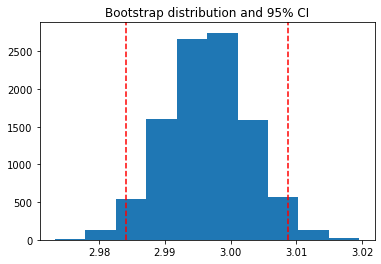

In [4]:
# Visualize the historgram with the intervals
fig, ax = plt.subplots()
ax.hist(means)
for ln in [clo, chi]:
    ax.axvline(ln, ls='--', c='r')
ax.set_title("Bootstrap distribution and 95% CI")
glue("boot_fig", fig, display=False)

In [5]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6], "C": [7, 8, 9]})
glue("df_tbl", df, display=False)
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


```{tip}
Since we are going to paste this figure into our document at a later point,
you may wish to remove the output here, using the `remove_output` tag
(see {ref}`use/removing`).
```

(glue/pasting)=

## Pasting glued variables into your page

If you have a notebook that contains glued variables, you can then **paste**
those variables into your text anywhere you like.
These variables can be pasted using one of the roles or directives in the `glu:` *family*.

### Using the `glu:any` role/directive

The simplest role and directive are `glu:any`,
which paste the glued output inline or as a block respectively,
with no additional formatting.
Simply add this:

````
```{glu:any} your-key
```
````

For example, we'll paste the plot we generated above with the following text:

````md
```{glu:any} boot_fig
```
````

Here's how it looks:

```{glu:any} boot_fig
```

Or we can paste inline objects:


```md
Inline text; {glu:any}`boot_mean`, and figure; {glu:any}`boot_fig`.
```

Inline text; {glu:any}`boot_mean`, and figure; {glu:any}`boot_fig`.




### Using the `glu:text` role

The `glu:text` role, is specific to text outputs
(glued variables that contain a `text/plain` mimetype).
For example, the following text:

```
The mean of the bootstrapped distribution was {glu:text}`boot_mean` (95% confidence interval {glu:text}`boot_clo`/{glu:text}`boot_chi`).
```

Is rendered as: 
The mean of the bootstrapped distribution was {glu:text}`boot_mean` (95% confidence interval {glu:text}`boot_clo`/{glu:text}`boot_chi`)

```{note}
`glu:text` only works with glued variables that contain a `text/plain` output.
```

With `glu:text` we can add formatting to the output.
This is particularly useful if you are displaying numbers and
want to round the results. To add formatting, use this pattern:

* `` {glu:text}`mykey:formatstring` ``

For example, the following: ``My rounded mean: {glu:text}`boot_mean:.2f` `` will be rendered like this: My rounded mean: {glu:text}`boot_mean:.2f` (95% CI: {glu:text}`boot_clo:.2f`/{glu:text}`boot_chi:.2f`).


### Using the `glu:figure` directive

With `glu:figure` you can apply more formatting to figure like objects,
such as giving them a caption and referencable label:

````md
```{glu:figure} boot_fig
:figwidth: 300px
:name: "fig:boot"

This is a **caption**, with an embedded `{glu:text}` {glu:text}`boot_mean:.2f`!
```
````

```{glu:figure} boot_fig
:figwidth: 300px
:name: "fig:boot"

This is a **caption**, with an embedded `{glu:text}` {glu:text}`boot_mean:.2f`!
```

```md
Here is a {ref}`reference to the figure <fig:boot>`
```

Here is a {ref}`reference to the figure <fig:boot>`

Here's a table:

````md
```{glu:figure} df_tbl
:figwidth: 300px
:name: "tbl:df"

A caption for a pandas table.
```

````
```{glu:figure} df_tbl
:figwidth: 300px
:name: "tbl:df"

A caption for a pandas table.
```